# Supervised Learning - Part 1

Assume there is an unknown function $F^*$ that maps $X_n$'s to $Y$'s such that $Y=F^*(X)$. 

Let's call $F^*$ our *Target* function.

We generally can't hope to ever observe $F^*$ directly, but we have examples (or samples) of its inputs and its output.

![](./images/some_data_annotated.png)

The goal of a **Supervised Learning** algorithm is to find a good *Model* $\hat{F}$ of the unknown *Target* $F^*$ based on these examples.


## How do algorithms search for Models?


Algorithms **learn** from data by computing an *estimate* $\hat{F}$ from the data examples. This can be thought of as *fitting* a function to the data examples:

$\hat{F(X)} = \underset{\theta}{\operatorname{argmin}} L(Y,f(X;\theta))$


Where $L(Y,f(X;\theta))$ is a function that measures the error made by some function $f(X;\theta)$ in approximating $Y$. In other words, algorithms will try to find optimal values for a set of parameters $\theta$ such that the error in using $f$ evaluated at example inputs $X$ to approximate example outputs $Y$ is minimized. This process is called **Training** a model and the examples used to train the model are called the **Training Set**. 

There are many options of error measure $L$. The choice of $L$ depends on the type of problem (or type of Task) and the choice of algorithm. $L$ is called the **Loss** function, and it's also sometimes called the **Energy** or **Cost** function. We'll come back to this subject later in the workshop.

Different algorithms will focus on different classes of function $f$ with a different number of parameters $\theta$ to approximate $Y$.

Here is a visual representation of these ideas.

## Imagine a space inhabited by functions...

![](./images/model_space.gif)

$\hat{F_1 (x)}$ and $\hat{F_2 (x)}$ are a models of $F^*(x)$. Both are close to the real thing, but are still not exactly it. There is an idea of **error**.

Different algorithms will be most effective at finding models within different parts of this space. Some algorithms are more restrictive and are ONLY able to search in very limited parts of the space.

![](./images/function_space.png)

**DISCLAIMER**: This diagram is merely illustrative and does not reflect the real overlaps and boundaries of different classes of functions.


Here is how you can see these ideas in practice:



In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

f = lambda x: np.cos(1.5 * np.pi * x)

samples = [(x,f(x) + np.random.normal(0,1) * 0.1) for x in np.sort(np.random.uniform(0,1,50))]

In [2] used 26.6133 MiB RAM in 0.37s, peaked 0.00 MiB above current, total RAM usage 72.05 MiB


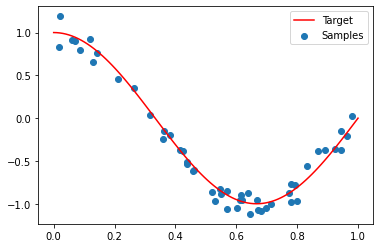

In [3] used 2.2305 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 74.28 MiB


In [3]:
X,Y = zip(*samples) 

X_test = np.linspace(0,1,100).reshape(-1,1)

plt.scatter(X,Y,label='Samples')
plt.plot(X_test,f(X_test),color='r',label='Target')

plt.legend(loc='upper right')

In [4]:
# IS LINEAR REGRESSION USEFUL ON THIS DATASET?

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

X = np.array(X).reshape(-1,1) # Scikit-learn needs this to work with only one input/feature

linear_model.fit(X,Y)

LinearRegression()

In [4] used 26.8555 MiB RAM in 0.41s, peaked 0.00 MiB above current, total RAM usage 101.13 MiB


In [5]:
Y_hat = linear_model.predict(X_test)

In [5] used 0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 101.15 MiB


In-sample Performance: 0.493372535432403


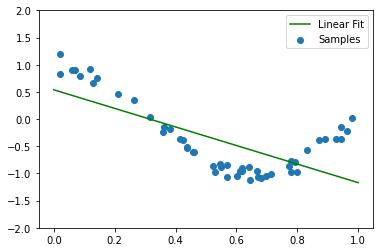

In [6] used 1.2773 MiB RAM in 0.27s, peaked 0.00 MiB above current, total RAM usage 102.43 MiB


In [6]:
plt.scatter(X,Y,label='Samples')
plt.ylim((-2,2))
plt.plot(X_test, Y_hat, color='g',label="Linear Fit")
plt.legend(loc="upper right")
print("In-sample Performance:", linear_model.score(X,Y))

In-sample Performance: 0.9211104866259652


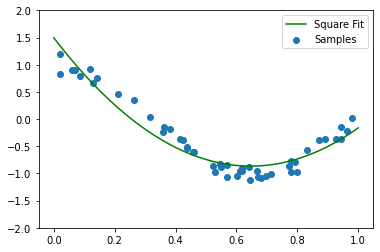

In [7] used 1.3008 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 103.73 MiB


In [7]:
# LET'S TRY WITH POLYNOMIAL BASIS EXPANSIONS

from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)

square_model = LinearRegression()

X_poly = poly.fit_transform(X)  #TRANSFORM X INTO X^n

square_model.fit(X_poly,Y)

X_poly_test = poly.fit_transform(X_test)

plt.scatter(X,Y,label='Samples')
plt.ylim((-2,2))
plt.plot(X_test, square_model.predict(X_poly_test), color='g',label='Square Fit')
plt.legend(loc="upper right")
print("In-sample Performance:", square_model.score(X_poly,Y))

In-sample Performance: 0.9768614125706798


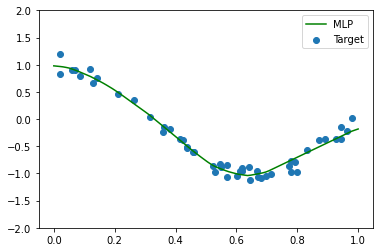

In [8] used 2.2422 MiB RAM in 0.37s, peaked 0.00 MiB above current, total RAM usage 105.97 MiB


In [8]:
# NOW LET'S TRY A NEURAL NETWORK

from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,50,25,10), max_iter=2000) #NEURAL NETWORKS ARE FLEXIBLE, TRY DIFFERENT NUMBERS OF LAYERS AND NEURONS...

mlp_model.fit(X,Y)

Y_hat = mlp_model.predict(X_test)

plt.scatter(X,Y,label='Target')
plt.ylim((-2,2))
plt.plot(X_test, Y_hat, color='g',label="MLP")
plt.legend(loc="upper right")
print("In-sample Performance:", mlp_model.score(X,Y))

## How do you know if your Model is any good?

In the first example above, the model was obviously bad... the model is not even trying to (because it can't) catch the "curvy" pattern in the data. This phenomenon is called **Underfitting**.  

In the second example, the model looks close!

In the third example you have to try different parameters, but you can get very, very close to the target!

What we did above was, borrowing from statistical jargon, **training models** by minimizing the error on *in-sample* data... but what we are actually interested in is how our model performs on *out-of-sample* data! We care about predicting $Y$ in the population!

So are these good models of $F^*$? 

The answer depends on what you are trying to predict. If you are concerned with predicting only points inside the $[0,1]$ interval, then yes, these models seem approximate well points that were not included in the original sample:

Out-of-sample Performance: 0.9130826424266557


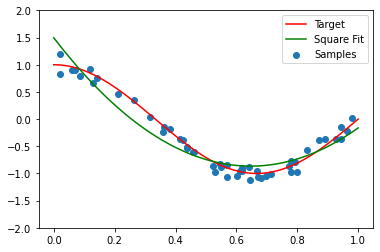

In [9] used 1.0781 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 107.05 MiB


In [9]:
plt.plot(X_test, f(X_test), color='r',label="Target")
plt.scatter(X,Y,label='Samples')
plt.ylim((-2,2))
plt.plot(X_test, square_model.predict(X_poly_test), color='g',label='Square Fit')
plt.legend(loc="upper right")
print("Out-of-sample Performance:", square_model.score(X_poly_test,f(X_test)))

Out-of-sample Performance: 0.9919005594289995


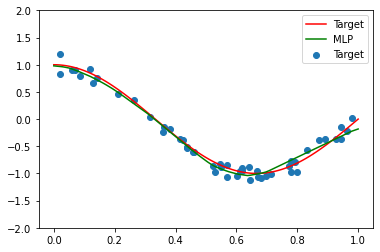

In [10] used 1.1484 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 108.20 MiB


In [10]:
plt.plot(X_test, f(X_test), color='r',label="Target")
plt.scatter(X,Y,label='Target')
plt.ylim((-2,2))
plt.plot(X_test, Y_hat, color='g',label="MLP")
plt.legend(loc="upper right")
print("Out-of-sample Performance:", mlp_model.score(X_test,f(X_test)))

But here's what our models looks like when we extend the range of the plot a bit to show points farther away from the sample we used to train:

In [11]:
new_X = np.linspace(-1,2,100).reshape(-1,1)

new_Y = f(new_X)

new_X_poly = poly.fit_transform(new_X)

In [11] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 108.20 MiB


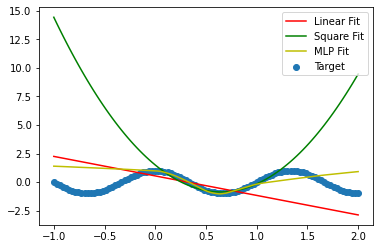

In [12] used 1.2109 MiB RAM in 0.27s, peaked 0.00 MiB above current, total RAM usage 109.41 MiB


In [12]:
plt.scatter(new_X,new_Y,label="Target")

plt.plot(new_X, linear_model.predict(new_X), color='r',label="Linear Fit")
plt.plot(new_X, square_model.predict(new_X_poly), color='g',label="Square Fit")
plt.plot(new_X, mlp_model.predict(new_X), color='y',label="MLP Fit")

plt.legend(loc="upper right")

In general, the in-sample error, or **Training Error**, is not a very good measure of how well the model will do on out-of-sample data. In fact, models can have an arbitrarily small **Training Error** and be very bad at predicting out-of-sample values. To see this, consider what would happen if you were to try the example above with a very wiggly function:

In-sample Performance: 0.9931372817858044


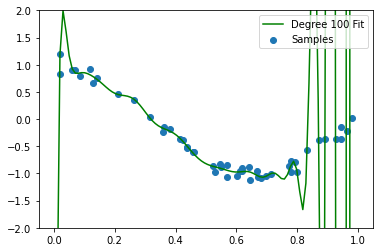

In [13] used 1.3438 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 110.75 MiB


In [13]:
#LET'S TRY FITTING A DEGREE 100 POLYNOMIAL TO OUR SAMPLES

poly_too_high = PolynomialFeatures(degree=100)

too_high_model = LinearRegression()

X_poly = poly_too_high.fit_transform(X)  #TRANSFORM X INTO X^n

too_high_model.fit(X_poly,Y)

X_poly_test = poly_too_high.fit_transform(X_test)

plt.scatter(X,Y,label="Samples")
plt.ylim((-2,2))
plt.plot(X_test, too_high_model.predict(X_poly_test), color='g',label="Degree 100 Fit")
plt.legend(loc="upper right")
print("In-sample Performance:", too_high_model.score(X_poly,Y))

Out-of-sample Performance: -738217553871.361


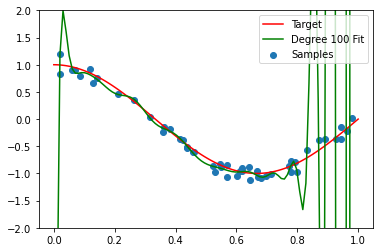

In [14] used 1.3047 MiB RAM in 0.26s, peaked 0.00 MiB above current, total RAM usage 112.06 MiB


In [14]:
plt.plot(X_test, f(X_test), color='r',label="Target")
plt.scatter(X,Y,label="Samples")
plt.ylim((-2,2))
plt.plot(X_test, too_high_model.predict(X_poly_test), color='g',label="Degree 100 Fit")
plt.legend(loc="upper right")
print("Out-of-sample Performance:", too_high_model.score(X_poly_test,f(X_test)))

(-5.0, 5.0)

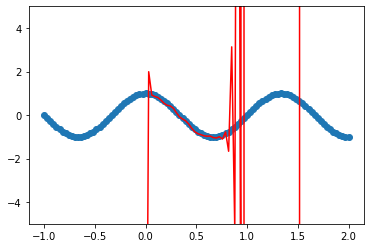

In [15] used 1.0391 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 113.10 MiB


In [15]:
#AND THEN ZOOMING OUT

new_X_too_high = poly_too_high.fit_transform(new_X)

plt.scatter(new_X,new_Y,label="Target")
plt.plot(new_X, too_high_model.predict(new_X_too_high), color='r',label="Linear Fit")
plt.ylim((-5,5))

As you can see, the ***training*** error here is low - the model actually passes right through most of the points in the sample! But it is also obvious that this model is not very accurate at predicting points outside the sample, whether that's close to the range of the sample or not. 

So in practice you will need to have not one, but TWO datasets. One to train your model on and another to validate it. This second dataset is called a **Test Set** and it is a collection of inputs and outputs you obtained from the same source as your training data, but that you **did not use to train your model.**

It is the error in this dataset, called the **Test Error** that matters when we talk about the quality of our predictions, and hence the quality of our model.

Concretely, you will train your model on the **Training Set**, looking to minimize the **Training Error**. Then you will pick up the model you trained and plug in the inputs from your **Test Set**. You will then use the outputs you get from your model and compare them to the outputs in your **Test Set**. This will allow you to compute your **Test Error**.

Rinse and repeat until you're statisfied with the performance of your model on the **Test Set**!

A common rule-of-thumb is to break your initial data set in two chunks: about 80% of all examples go into your **Training Set**, the remaining 20% are set aside for your **Test Set**.

Another popular approach is to break your initial data set in THREE chunks: a **Training Set**, a **Validation Set** and a **Test Set**, where the **Validation Set** is not used directly to train the model, but the error in this set is used as the yardstick to *fine-tune* a model, so it participates indirectly in the training.


Let's look into some examples with real datasets to see how this works:

## Real Example 1: Flower Species Classification

In the toy examples we've seen above, we used a mathematical function to generate points and used different algorithms to try and approximate it. In that case, both our input X and output Y were quantitative (a real number representing a quantity). In Machine Learning this type of task, i.e. predicting a quantitative output, is called **Regression**.

Now let's look at an example where the output is no longer quantitative, but *categorical*, meaning that the output variable represents categories of things - a task called **Classification**.

We will use a popular Python Machine Learning library called **scikit-learn** to show how it works in practice.

### The Iris dataset

This example uses a classic dataset called the "Iris" dataset. It contains a number of measurements of different species of Iris flowers along with a label indicating which of 3 species of Iris the measurements came from.

We will train a model to take in measurements as inputs and predict the species.

Let's take a look at the data:

In [16]:
from pandas import read_csv

headers = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

iris_dataset = read_csv('./data/iris.csv', names = headers)

In [16] used 10.3789 MiB RAM in 0.68s, peaked 0.00 MiB above current, total RAM usage 123.48 MiB


In [17]:
print(iris_dataset) # A GOOD FIRST STEP IS TO LOOK AT THE ACTUAL DATA

     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
In [17] used 0.3242 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 123

In [18]:
print(iris_dataset.describe()) # THEN COMPUTE SUMMARY STATISTICS

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
In [18] used 0.2188 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 124.02 MiB


In [19]:
print(iris_dataset.groupby('species').size()) # ARE THERE IMBALANCES IN THE OUTPUT CATEGORIES?

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
In [19] used 0.0820 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 124.10 MiB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1227dc438>,
      dtype=object)

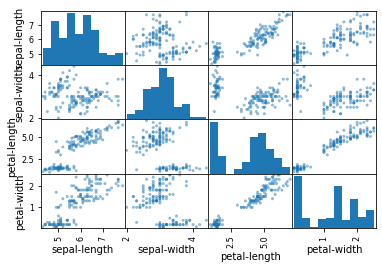

In [20] used 6.7852 MiB RAM in 0.90s, peaked 0.06 MiB above current, total RAM usage 130.89 MiB


In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris_dataset) # PLOT ALL VARIABLES 2 BY 2... ARE THERE ANY VISIBLE PATTERNS?

In [21]:
# LET'S CREATE A TRAINING SET AND A TEST SET

from sklearn.model_selection import train_test_split

X = iris_dataset.values[:,0:4]
Y = iris_dataset.values[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [21] used 0.0703 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 130.96 MiB


In [22]:
# NOW LET'S TRY DIFFERENT ALGORITHMS - FIRST A LINEAR MODEL: LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')

lr_model

LogisticRegression(multi_class='ovr', solver='liblinear')

In [22] used 0.0234 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 130.98 MiB


In [23]:
lr_model.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [23] used 0.1562 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 131.14 MiB


In [24]:
Y_hat = lr_model.predict(X_test)

Y_hat

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [24] used 0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 131.14 MiB


In [25]:
print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")

This model got 93.33333333333333 % of predictions right.
In [25] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 131.14 MiB


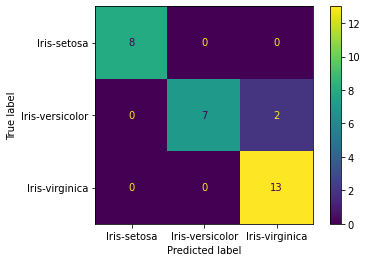

In [26] used 1.5117 MiB RAM in 0.26s, peaked 0.00 MiB above current, total RAM usage 132.65 MiB


In [26]:
plot_confusion_matrix(lr_model,X_test, Y_test)

This model got 96.66666666666667 % of predictions right.


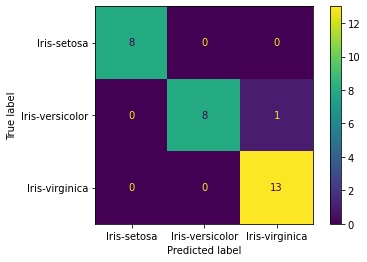

In [27] used 3.1328 MiB RAM in 0.37s, peaked 0.00 MiB above current, total RAM usage 135.79 MiB


In [27]:
# ANOTHER MODEL: TREE CLASSIFIERS

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, Y_train)

Y_hat = tree_model.predict(X_test)

plot_confusion_matrix(tree_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


This model got 96.66666666666667 % of predictions right.


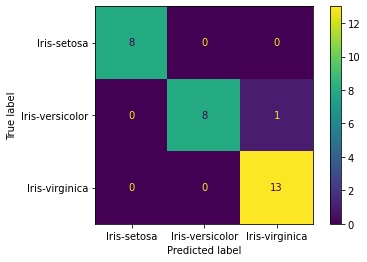

In [28] used 1.4102 MiB RAM in 0.25s, peaked 0.00 MiB above current, total RAM usage 137.20 MiB


In [28]:
# ONE MORE: SUPPORT VECTOR MACHINES (SVM)

from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear')

svm_model.fit(X_train, Y_train)

Y_hat = svm_model.predict(X_test)

plot_confusion_matrix(svm_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")

For more options of Algorithms, see: https://scikit-learn.org/stable/supervised_learning.html

## Exercise 1: Wine Classification

Now it's your turn. This next dataset contains a number of measurements done in a chemical analysis of 3 different types of wine.

You will train a Support Vector Machine model to predict the type of wine based on the measurements. Use the example above as inspiration.

In [506]:
from pandas import read_csv
from sklearn.svm import SVC

headers = ['wine_type','alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium',
           'total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280_OD315','proline']

wine_dataset = read_csv('./data/wine.csv', names = headers)

# PRINT SUMARY STATISTICS

# PRINT THE DATASET

# LOOK FOR IMBALANCES - THE OUPUT VARIABLE IS 'wine_type'

# LOOK FOR VISUAL PATTERNS

# CREATE TRAINING AND TEST SETS - THE OUTPUT VARIBALE 'wine_type' IS ON COLUMN 0

# FIT A MODEL TO THE TRAINING SET

# CHECK ITS PERFORMANCE ON THE TEST SET


## Real Example 2: Image Classification

In the Flower Species Classification example we had a dataset with numerical features/inputs and a categorical response/output. The categories in our example appeared as text, but the code transformed them into numbers under the hood. What other types of data can be encoded as numbers?

The answer is: pretty much anything can. 

Let's look at a Classification problem using images. We will train a model to classify images as either Apples or Oranges:

In [29]:
import numpy as np
import os
from PIL import Image 
import matplotlib.pyplot as plt

an_apple = Image.open('./Fruit-Images-Dataset/Training/apples/0_100.jpg')

print("This is how the computer 'sees' the image: \n")

print(np.array(an_apple)[:,:,0], "\n")

This is how the computer 'sees' the image: 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

In [29] used 0.6562 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 137.85 MiB


This is how we see it:


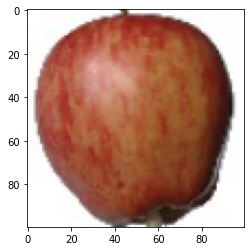

In [649]:
plt.imshow(np.array(an_apple)[:,:,:]) # TRY PRINTING THE THREE DIFFERENT CHANNELS - [:,:,0], [:,:,1], [:,:,2]
print("This is how we see it:"):,:

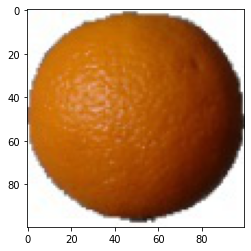

In [544]:
an_orange = Image.open('./Fruit-Images-Dataset/Training/oranges/0_100.jpg')

plt.imshow(an_orange)

In [30]:
# LET'S CREATE OUR TRAINING SET!

apples_dir = './Fruit-Images-Dataset/Training/apples/'
oranges_dir = './Fruit-Images-Dataset/Training/oranges/'

#os.listdir(apples_dir)

In [30] used 0.0117 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 137.86 MiB


In [31]:
# LOAD APPLES STEP BY STEP - WITH ILLUSTRATIVE VARIABLE NAMES

apples = []

for filename in os.listdir(apples_dir):
    
    apple_full_path = apples_dir + filename
    
    apple = Image.open(apple_full_path)
    
    apple_flattened = np.array(apple).flatten()
    
    apple_resized = apple_flattened/255
    
    a_training_example = (apple_resized, "apple")
    
    apples.append(a_training_example)

apples

[(array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([0.97647059, 1.        , 0.98431373, ..., 1.        , 1.        ,
         1.        ]),
  'apple'),
 (array([0.99607843, 1.        , 0.99215686, ..., 1.        , 1.        ,
         1.        ]),
  'apple'),
 (array([0.98431373, 1.        , 0.98823529, ..., 1.        , 1.        ,
         1.        ]),
  'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([1., 1., 1., ..., 1., 1., 1.]), 'apple'),
 (array([0.98431373, 1.        , 0.97647059, ..., 1.        , 1.        ,
         1.        ]),
  'apple'),
 (array([1., 1

In [31] used 113.5469 MiB RAM in 0.79s, peaked 0.00 MiB above current, total RAM usage 251.41 MiB


In [32]:
# LOAD ORANGES WITH A PYTHON ONE-LINER... CAN YOU SEE HOW THIS DOES THE SAME THING AS THE FOR-LOOP BLOCK ABOVE?

oranges = [ (np.array(Image.open(oranges_dir + img)).flatten()/255,"orange") for img in os.listdir(oranges_dir) ]

In [32] used 110.4883 MiB RAM in 0.76s, peaked 0.00 MiB above current, total RAM usage 361.90 MiB


In [33]:
# ZIP SEPARATES ARRAYS FROM LABELS

X_train,Y_train = zip(*(apples + oranges))

In [33] used 0.0078 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 361.91 MiB


In [34]:
# HERE'S HOW ZIP WORKS:

my_list = [(np.array([1,2,3]), "one"),(np.array([4,5,6]), "two")]

a,b = zip(*my_list)

a

(array([1, 2, 3]), array([4, 5, 6]))

In [34] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 361.91 MiB


In [35]:
# STACK "STACKS" VECTORS INTO A MATRIX

X_train = np.stack(X_train)

In [35] used 222.3125 MiB RAM in 0.23s, peaked 0.00 MiB above current, total RAM usage 584.22 MiB


In [36]:
# HERE'S HOW STACK WORKS

print(a)

np.stack(a)

(array([1, 2, 3]), array([4, 5, 6]))


array([[1, 2, 3],
       [4, 5, 6]])

In [36] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 584.22 MiB


In [37]:
# NOW THE TEST SET

apples_dir = './Fruit-Images-Dataset/Test/apples/'
oranges_dir = './Fruit-Images-Dataset/Test/oranges/'

apples = [ (np.array(Image.open(apples_dir + img)).flatten()/255,"apple") for img in os.listdir(apples_dir) ]

oranges = [ (np.array(Image.open(oranges_dir + img)).flatten()/255,"orange") for img in os.listdir(oranges_dir) ]

X_test,Y_test = zip(*(apples + oranges))

X_test = np.stack(X_test)


In [37] used 40.7266 MiB RAM in 0.63s, peaked 28.91 MiB above current, total RAM usage 624.95 MiB


This model got 100.0 % of predictions right.


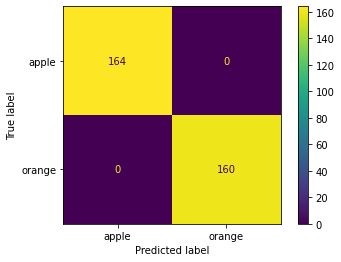

In [38] used 0.3359 MiB RAM in 3.91s, peaked 439.69 MiB above current, total RAM usage 625.28 MiB


In [38]:
# THEN TRAIN A LOGISTIC REGRESSION MODEL AND SEE HOW IT DOES

lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')

lr_model.fit(X_train, Y_train)

Y_hat = lr_model.predict(X_test)

plot_confusion_matrix(lr_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


## Exercise 2: Handwritten Digit Classification

Your turn again. This next dataset is another classic: the MNIST dataset of handwritten digits.

In this exercise, you will train a model of your choice on images of handwritten numbers that sometimes look alike when people write them: 0, 6 and 8.

Use all the examples we've seen so far as insipration.

In [73]:
# START BY CREATING YOUR TRAINING SET...

zero_dir = './MNIST-Dataset/Training/0/'
six_dir = './MNIST-Dataset/Training/6/'
eight_dir = './MNIST-Dataset/Training/8/'


X_train,Y_train = ####

In [73]:
# ...AND YOUR TEST SET

zero_dir = './MNIST-Dataset/Test/0/'
six_dir = './MNIST-Dataset/Test/6/'
eight_dir = './MNIST-Dataset/Test/8/'

X_test, Y_test = ####

This model got 98.48901098901099 % of predictions right.


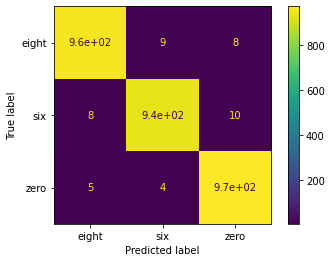

In [74]:
# TRAIN YOUR MODEL AND EVALUATE ITS PERFORMANCE ON THE TEST SET

my_model = ####

Y_hat = my_model(####)

plot_confusion_matrix(my_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")

## Summarizing what we've seen so far

Based on what we've covered so far, a Machine Learning program will generally have the following elements:

1. A class of functions $f(x;\theta)$ that the algorithm will use to try and approximate the taget $F^*$. 

    a. $f(x;\theta)$ can be a restrictive class of functions such as linear functions ($\beta_0 + \sum{\beta_i X_i}$) or a very flexible one, such as Neural Networks (we will see what they look like on the next notebook)
    
2. A Training Set: a dataset containing examples of inputs and outputs of interest.  

3. A Test Set: another dataset with examples of inputs and outputs that are not used to train the model.

4. A measure of the error in using $f(x;\theta)$ to approximate $F^*$, called the Loss function $L(Y,f(X;\theta))$. $L$ is used to train the model on the training set (see point 5) and can be used to measure performance on the Test Set. 

5. A way of solving the optimization problem: $\hat{F(X)} = \underset{\theta}{\operatorname{argmin}} L(Y,f(X;\theta))$

In the **scikit-learn** examples above, you will notice that 4, 5 and certain aspects of 1 are done mostly under the hood, leaving very little control up to you.

Next we turn to a more modern Machine Learning library that is better suited for high performance and solving difficult problems: **PyTorch**.
